In [76]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam


from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

In [77]:
myAdam = keras.optimizers.legacy.Adam(learning_rate=0.1)
mySgd = keras.optimizers.legacy.SGD(learning_rate=0.1, momentum=0.0, nesterov=True)

In [85]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255
x_test = x_test / 255


y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

model = keras.models.Sequential([
    #Added
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

print(model.summary())


model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_21 (Flatten)        (None, 3136)              0         
                                                                 
 dense_42 (Dense)            (None, 128)             

In [86]:

model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 41s 26ms/step - loss: 0.1437 - accuracy: 0.9560 - val_loss: 0.0657 - val_accuracy: 0.9818
Epoch 2/5
1500/1500 [==============================] - 38s 26ms/step - loss: 0.0455 - accuracy: 0.9859 - val_loss: 0.0466 - val_accuracy: 0.9875
Epoch 3/5
1500/1500 [==============================] - 38s 26ms/step - loss: 0.0302 - accuracy: 0.9905 - val_loss: 0.0399 - val_accuracy: 0.9883
Epoch 4/5
1500/1500 [==============================] - 38s 25ms/step - loss: 0.0214 - accuracy: 0.9930 - val_loss: 0.0463 - val_accuracy: 0.9883
Epoch 5/5
1500/1500 [==============================] - 39s 26ms/step - loss: 0.0154 - accuracy: 0.9950 - val_loss: 0.0449 - val_accuracy: 0.9865


In [87]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 3s 8ms/step - loss: 0.0373 - accuracy: 0.9882


[0.037317801266908646, 0.9882000088691711]

1/1 [==============================] - 0s 42ms/step
Цифра: 2


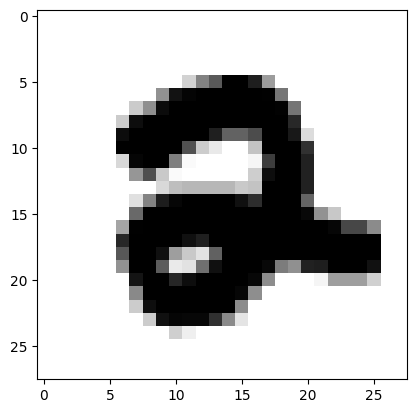

In [89]:
n = 222  
x = np.expand_dims(x_test[n], axis=0)

res = model.predict(x)
print(f'Цифра: {np.argmax(res)}')

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()